# HW6

In [183]:
%pylab inline
from sklearn.cluster import KMeans
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
training = loadtxt('data/training.txt.1')
validation = loadtxt('data/validation.txt')
test = loadtxt('data/test.txt')

In [185]:
def substract_max_data(data):
    data_copy = copy(data)
    for i in range((20)):
        x_vals = array(list((set(data_copy[:,i]))))
        values = arange(1, len(x_vals)+1)
        for j in range(len(data)-1):
            index = where(data_copy[j,i]==x_vals)[0]
            data_copy[j,i] = values[index]
    return data_copy

In [186]:
def ages_data(data2):
    data_copy2 = copy(data2)
    for i in range((20)):
        x_vals = array(list((set(data2[:,i]))))
        values = arange(1, len(x_vals)+1)
        if i!=12:
            for j in range(len(data2)-1):
                index = where(data2[j,i]==x_vals)[0]
                data_copy2[j,i] = values[index]
    return data_copy2
    

In [187]:
def genre_data(data3):
    data_copy3 = copy(data3)
    for i in range((20)):
        x_vals = array(list((set(data3[:,i]))))
        values = arange(1, len(x_vals)+1)
        if i!=8:
            for j in range(len(data3)-1):
                index = where(data3[j,i]==x_vals)[0]
                data_copy3[j,i] = values[index]
    return data_copy3
    

In [188]:
training_all = substract_max_data(training)
validation_all = substract_max_data(validation)
test_all = substract_max_data(test)

In [189]:
train_ages = ages_data(training)
validation_ages = ages_data(validation)
test_ages = ages_data(test)

In [190]:
train_genre = genre_data(training)
validation_genre = genre_data(validation)
test_genre = genre_data(test)

(array([ 147.,  187.,  169.,   94.,   85.,   42.,   31.,   22.,   17.,    6.]),
 array([ 20. ,  25.5,  31. ,  36.5,  42. ,  47.5,  53. ,  58.5,  64. ,
         69.5,  75. ]),
 <a list of 10 Patch objects>)

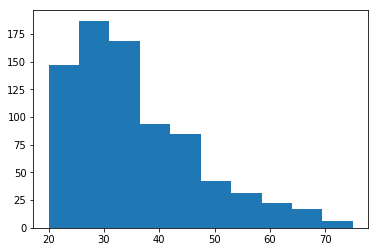

In [156]:
hist(train_ages[:,12])

(array([  40.,    0.,    0.,  247.,    0.,    0.,  441.,    0.,    0.,   72.]),
 array([ 91. ,  91.3,  91.6,  91.9,  92.2,  92.5,  92.8,  93.1,  93.4,
         93.7,  94. ]),
 <a list of 10 Patch objects>)

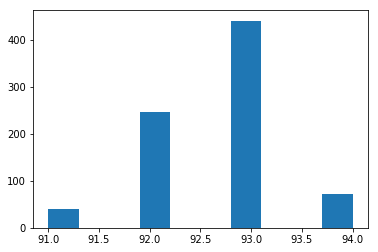

In [157]:
hist(train_genre[:,8])

In [158]:
def bin_data(data):
    binned = copy(data)
    index1 = np.where(data[:,12] <30)
    index2 = np.where((data[:,12] <40) & (data[:,12] > 30))
    index3 = np.where((data[:,12] <50) & (data[:,12] > 40))
    index4 = np.where((data[:,12] <60) & (data[:,12] > 50))
    index5 = np.where((data[:,12] <70) & (data[:,12] > 60))
    index6 = np.where(data[:,12] > 70)
    
    return binned[index1],  binned[index2],  binned[index3],  binned[index4],  binned[index5],  binned[index6] 

def bin_genre(data):
    binned2 = copy(data)
    index1 = np.where(data[:,8] == 91)
    index2 = np.where(data[:,8] == 92)
    index3 = np.where(data[:,8]  == 93)
    index4 = np.where(data[:,8] == 94)
    return binned2[index1],  binned2[index2],  binned2[index3],  binned2[index4] 

In [159]:
tr_ages1, tr_ages2, tr_ages3, tr_ages4, tr_ages5, tr_ages6 = bin_data(train_ages)
val_ages1, val_ages2, val_ages3, val_ages4, val_ages5, val_ages6 = bin_data(validation_ages)

In [160]:
tr_genre1, tr_genre2, tr_genre3, tr_genre4=   bin_genre(train_genre)
val_genre1, val_genre2, val_genre3, val_genre4  = bin_genre(validation_genre)

In [161]:
X_tr = training_all[:,:-1]
Y_tr = training_all[:,-1]

X_val = validation_all[:,:-1]
Y_val = validation_all[:,-1]

X_test = test_all

X_tr_age1 = tr_ages1[:,:-1]
Y_tr_age1 = tr_ages1[:,-1]

X_tr_age2 = tr_ages2[:,:-1]
Y_tr_age2 = tr_ages2[:,-1]

X_tr_age3 = tr_ages3[:,:-1]
Y_tr_age3 = tr_ages3[:,-1]

X_tr_age4 = tr_ages4[:,:-1]
Y_tr_age4 = tr_ages4[:,-1]

X_tr_age5 = tr_ages5[:,:-1]
Y_tr_age5 = tr_ages5[:,-1]

X_tr_age6 = tr_ages6[:,:-1]
Y_tr_age6 = tr_ages6[:,-1]

X_val_age1 = val_ages1[:,:-1]
Y_val_age1 = val_ages1[:,-1]

X_val_age2 = val_ages2[:,:-1]
Y_val_age2 = val_ages2[:,-1]

X_val_age3 = val_ages3[:,:-1]
Y_val_age3 = val_ages3[:,-1]

X_val_age4 = val_ages4[:,:-1]
Y_val_age4 = val_ages4[:,-1]

X_val_age5 = val_ages5[:,:-1]
Y_val_age5 = val_ages5[:,-1]

X_val_age6 = val_ages6[:,:-1]
Y_val_age6 = val_ages6[:,-1]

X_tr_genre1 = tr_genre1[:,:-1]
Y_tr_genre1 = tr_genre1[:,-1]

X_tr_genre2 = tr_genre2[:,:-1]
Y_tr_genre2 = tr_genre2[:,-1]

X_tr_genre3 = tr_genre3[:,:-1]
Y_tr_genre3 = tr_genre3[:,-1]

X_tr_genre4 = tr_genre4[:,:-1]
Y_tr_genre4 = tr_genre4[:,-1]


X_val_genre1 = val_genre1[:,:-1]
Y_val_genre1 = val_genre1[:,-1]

X_val_genre2 = val_genre2[:,:-1]
Y_val_genre2 = val_genre2[:,-1]

X_val_genre3 = val_genre3[:,:-1]
Y_val_genre3 = val_genre3[:,-1]

X_val_genre4 = val_genre4[:,:-1]
Y_val_genre4 = val_genre4[:,-1]


#Y_tr = training[:,-1]

# K-means clustering

In [162]:
kmeans= KMeans(2, init='k-means++').fit(X_tr)

In [163]:
kmeans_pred = kmeans.predict(X_tr)

In [164]:
len(Y_tr)

800

In [165]:
def performance(predict, truth):
    perf1 = np.sum(np.abs((predict) - (truth-1)))
    index_zero = where(predict==0)
    index_one = where(predict==1)
    new_predict = predict
    new_predict[index_zero] = 1 
    new_predict[index_one] = 0 
    perf2 = np.sum(np.abs((new_predict) - (truth-1)))

    #index_zero = where(predict==0)
    #k_means_pred_adj = predict
    #k_means_pred_adj[index_zero] = 2
    #perf2  = sum(np.abs((k_means_pred_adj) - truth
    
    return 1- min(perf1, perf2)/len(truth)

In [166]:
perf_kmeans_tr = performance(kmeans_pred, Y_tr)

In [167]:
kmeans_pred2 = kmeans.predict(X_val)


In [168]:
perf_kmeans_val = performance(kmeans_pred2, Y_val)

In [169]:
print(perf_kmeans_tr, perf_kmeans_val)

0.53 0.69


## Age dependence

In [170]:
kmeans_age1= KMeans(2, init='k-means++').fit(X_tr_age1)
kmeans_age2= KMeans(2, init='k-means++').fit(X_tr_age2)
kmeans_age3= KMeans(2, init='k-means++').fit(X_tr_age3)
kmeans_age4= KMeans(2, init='k-means++').fit(X_tr_age4)
kmeans_age5= KMeans(2, init='k-means++').fit(X_tr_age5)
kmeans_age6= KMeans(2, init='k-means++').fit(X_tr_age6)


In [171]:
kmeans_pred_age_tr1 = kmeans_age1.predict(X_tr_age1)
kmeans_pred_age_tr2 = kmeans_age2.predict(X_tr_age2)
kmeans_pred_age_tr3 = kmeans_age3.predict(X_tr_age3)
kmeans_pred_age_tr4 = kmeans_age4.predict(X_tr_age4)
kmeans_pred_age_tr5 = kmeans_age5.predict(X_tr_age5)
kmeans_pred_age_tr6 = kmeans_age6.predict(X_tr_age6)

In [172]:
pef_kmeans_tr_age1 = performance(kmeans_pred_age_tr1, Y_tr_age1)
print(pef_kmeans_tr_age1)

pef_kmeans_tr_age2 = performance(kmeans_pred_age_tr2, Y_tr_age2)
print(pef_kmeans_tr_age2)

pef_kmeans_tr_age3 = performance(kmeans_pred_age_tr3, Y_tr_age3)
print(pef_kmeans_tr_age3)

pef_kmeans_tr_age4 = performance(kmeans_pred_age_tr4, Y_tr_age4)
print(pef_kmeans_tr_age4)

pef_kmeans_tr_age5 = performance(kmeans_pred_age_tr5, Y_tr_age5)
print(pef_kmeans_tr_age5)

pef_kmeans_tr_age6 = performance(kmeans_pred_age_tr6, Y_tr_age6)
print(pef_kmeans_tr_age6)

0.535353535354
0.517391304348
0.520661157025
0.533333333333
0.625
0.6


## validation

In [173]:
kmeans_pred_age_val1 = kmeans_age1.predict(X_val_age1)
kmeans_pred_age_val2 = kmeans_age2.predict(X_val_age2)
kmeans_pred_age_val3 = kmeans_age3.predict(X_val_age3)
kmeans_pred_age_val4 = kmeans_age4.predict(X_val_age4)
kmeans_pred_age_val5 = kmeans_age5.predict(X_val_age5)
#kmeans_pred_age_val6 = kmeans_age6.predict(X_val_age6)

pef_kmeans_val_age1 = performance(kmeans_pred_age_val1, Y_val_age1)
print(pef_kmeans_val_age1)

pef_kmeans_val_age2 = performance(kmeans_pred_age_val2, Y_val_age2)
print(pef_kmeans_val_age2)

pef_kmeans_val_age3 = performance(kmeans_pred_age_val3, Y_val_age3)
print(pef_kmeans_val_age3)

pef_kmeans_val_age4 = performance(kmeans_pred_age_val4, Y_val_age4)
print(pef_kmeans_val_age4)

pef_kmeans_val_age5 = performance(kmeans_pred_age_val5, Y_val_age5)
print(pef_kmeans_val_age5)

#pef_kmeans_val_age6 = performance(kmeans_pred_age_val6, Y_val_age6)
#print(pef_kmeans_val_age6)

0.594594594595
0.68
0.833333333333
0.857142857143
0.5


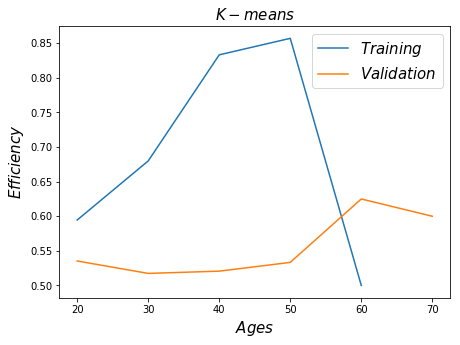

In [174]:
ages = [20, 30, 40, 50, 60, 70]
figure(figsize=(7,5))
plot(ages[:-1], [pef_kmeans_val_age1, pef_kmeans_val_age2, pef_kmeans_val_age3,
                 pef_kmeans_val_age4, pef_kmeans_val_age5], label='$Training$')
plot(ages, [pef_kmeans_tr_age1, pef_kmeans_tr_age2, pef_kmeans_tr_age3, pef_kmeans_tr_age4,
            pef_kmeans_tr_age5, pef_kmeans_tr_age6], label='$Validation$')
legend(fontsize=15)
xlabel('$Ages$', fontsize=15)
ylabel('$Efficiency$', fontsize=15)
title('$K-means$', fontsize=15)
savefig('Kmeans_age.pdf', bbox_inches='tight')

## Age dependence

In [175]:
kmeans_genre1 = KMeans(2, init='k-means++').fit(X_tr_genre1)
kmeans_genre2 = KMeans(2, init='k-means++').fit(X_tr_genre2)
kmeans_genre3 = KMeans(2, init='k-means++').fit(X_tr_genre3)
kmeans_genre4 = KMeans(2, init='k-means++').fit(X_tr_genre4)

kmeans_pred_gen_tr1 = kmeans_genre1.predict(X_tr_genre1)
kmeans_pred_gen_tr2 = kmeans_genre2.predict(X_tr_genre2)
kmeans_pred_gen_tr3 = kmeans_genre3.predict(X_tr_genre3)
kmeans_pred_gen_tr4 = kmeans_genre4.predict(X_tr_genre4)

kmeans_pred_gen_val1 = kmeans_genre1.predict(X_val_genre1)
kmeans_pred_gen_val2 = kmeans_genre2.predict(X_val_genre2)
kmeans_pred_gen_val3 = kmeans_genre3.predict(X_val_genre3)
kmeans_pred_gen_val4 = kmeans_genre4.predict(X_val_genre4)

In [176]:
pef_kmeans_val_gen1 = performance(kmeans_pred_gen_val1, Y_val_genre1)
print(pef_kmeans_val_gen1)

pef_kmeans_val_gen2 = performance(kmeans_pred_gen_val2, Y_val_genre2)
print(pef_kmeans_val_gen2)

pef_kmeans_val_gen3 = performance(kmeans_pred_gen_val3, Y_val_genre3)
print(pef_kmeans_val_gen3)

pef_kmeans_val_gen4 = performance(kmeans_pred_gen_val4, Y_val_genre4)
print(pef_kmeans_val_gen4)

pef_kmeans_tr_gen1 = performance(kmeans_pred_gen_tr1, Y_tr_genre1)
print(pef_kmeans_tr_gen1)

pef_kmeans_tr_gen2 = performance(kmeans_pred_gen_tr2, Y_tr_genre2)
print(pef_kmeans_tr_gen2)

pef_kmeans_tr_gen3 = performance(kmeans_pred_gen_tr3, Y_tr_genre3)
print(pef_kmeans_tr_gen3)

pef_kmeans_tr_gen4 = performance(kmeans_pred_gen_tr4, Y_tr_genre4)
print(pef_kmeans_tr_gen4)


0.5
0.678571428571
0.684210526316
0.818181818182
0.6
0.538461538462
0.528344671202
0.5


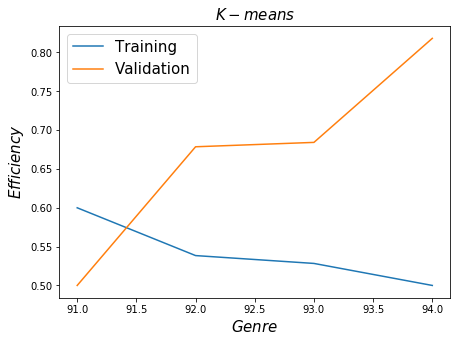

In [177]:
genre = ['Male_divorced', 'Female', 'Male single', 'Male Married']

figure(figsize=(7,5))


plot([91, 92, 93, 94],  [pef_kmeans_tr_gen1, pef_kmeans_tr_gen2, pef_kmeans_tr_gen3, pef_kmeans_tr_gen4], label='Training')
plot([91, 92, 93, 94],  [pef_kmeans_val_gen1, pef_kmeans_val_gen2, pef_kmeans_val_gen3, pef_kmeans_val_gen4], label='Validation')

legend(fontsize=15)
xlabel('$Genre$', fontsize=15)
ylabel('$Efficiency$', fontsize=15)
title('$K-means$', fontsize=15)
savefig('Kmeans_genre.pdf', bbox_inches='tight')

# SVM

In [191]:
def core_method_SVC(X_train, Y_train, data_test):
    clf = svm.SVC()
    clf.fit(X_train, Y_train)
    predictions = clf.predict(data_test)
    return predictions-1


def core_method_LinearSVC(X_train, Y_train, data_test):
    clf = svm.LinearSVC()
    clf.fit(X_train, Y_train)
    predictions = clf.predict(data_test)
    return predictions-1


def core_method_NuSVC(X_train, Y_train, data_test):
    clf = svm.NuSVC()
    clf.fit(X_train, Y_train)
    predictions = clf.predict(data_test)
    return predictions-1

In [192]:
predictions_SVC = core_method_SVC(X_tr, Y_tr, X_val)
predictions_LinearSVC = core_method_LinearSVC(X_tr, Y_tr, X_val)
predictions_NuSVC = core_method_NuSVC(X_tr, Y_tr, X_val)


predictions_SVC_tr = core_method_SVC(X_tr, Y_tr, X_tr)
predictions_LinearSVC_tr = core_method_LinearSVC(X_tr, Y_tr, X_tr)
predictions_NuSVC_tr = core_method_NuSVC(X_tr, Y_tr, X_tr)


perf_SVC = performance(predictions_SVC, Y_val)
perf_LinearSVC = performance(predictions_LinearSVC, Y_val)
perf_NuSVC = performance(predictions_NuSVC, Y_val)

perf_SVC_tr = performance(predictions_SVC_tr, Y_tr)
perf_LinearSVC_tr = performance(predictions_LinearSVC_tr, Y_tr)
perf_NuSVC_tr = performance(predictions_NuSVC_tr, Y_tr)

#for i in range(20):
#    dif[:,i] = np.abs(predictions[:,i] - Y_val)
#    print(sum(dif[:,i]), i)


In [195]:
predictions_SVC_test = core_method_LinearSVC(X_tr, Y_tr, X_test)

predictions_SVC_test
f = open('predictions_Nicolas.txt')

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [180]:
validation = [perf_kmeans_val, perf_SVC, perf_LinearSVC, perf_NuSVC]
training = [perf_kmeans_tr, perf_SVC_tr, perf_LinearSVC_tr, perf_NuSVC_tr]

x_axis = [0, 1, 2, 3]

In [181]:
predictions_SVC_val_age1 = core_method_SVC(X_tr_age1, Y_tr_age1, X_val_age1)
predictions_LinearSVC_val_age1 = core_method_LinearSVC(X_tr_age1, Y_tr_age1, X_val_age1)
predictions_NuSVC_val_age1 = core_method_NuSVC(X_tr_age1, Y_tr_age1, X_val_age1)

perf_SVC_val_age1 = performance(predictions_SVC_val_age1, Y_val_age1)
perf_LinearSVC_val_age1 = performance(predictions_LinearSVC_val_age1, Y_val_age1)
perf_NuSVC_val_age1 = performance(predictions_NuSVC_val_age1, Y_val_age1)


predictions_SVC_val_age2 = core_method_SVC(X_tr_age2, Y_tr_age2, X_val_age2)
predictions_LinearSVC_val_age2 = core_method_LinearSVC(X_tr_age2, Y_tr_age2, X_val_age2)
predictions_NuSVC_val_age2 = core_method_NuSVC(X_tr_age2, Y_tr_age2, X_val_age2)

perf_SVC_val_age2 = performance(predictions_SVC_val_age2, Y_val_age2)
perf_LinearSVC_val_age2 = performance(predictions_LinearSVC_val_age2, Y_val_age2)
perf_NuSVC_val_age2 = performance(predictions_NuSVC_val_age2, Y_val_age2)

predictions_SVC_val_age3 = core_method_SVC(X_tr_age3, Y_tr_age3, X_val_age3)
predictions_LinearSVC_val_age3 = core_method_LinearSVC(X_tr_age3, Y_tr_age3, X_val_age3)
predictions_NuSVC_val_age3 = core_method_NuSVC(X_tr_age3, Y_tr_age3, X_val_age3)

perf_SVC_val_age3 = performance(predictions_SVC_val_age3, Y_val_age3)
perf_LinearSVC_val_age3 = performance(predictions_LinearSVC_val_age3, Y_val_age3)
perf_NuSVC_val_age3 = performance(predictions_NuSVC_val_age3, Y_val_age3)

predictions_SVC_val_age4 = core_method_SVC(X_tr_age4, Y_tr_age4, X_val_age4)
predictions_LinearSVC_val_age4 = core_method_LinearSVC(X_tr_age4, Y_tr_age4, X_val_age4)
predictions_NuSVC_val_age4 = core_method_NuSVC(X_tr_age4, Y_tr_age4, X_val_age4)

perf_SVC_val_age4 = performance(predictions_SVC_val_age4, Y_val_age4)
perf_LinearSVC_val_age4 = performance(predictions_LinearSVC_val_age4, Y_val_age4)
perf_NuSVC_val_age4 = performance(predictions_NuSVC_val_age4, Y_val_age4)

predictions_SVC_val_age5 = core_method_SVC(X_tr_age5, Y_tr_age5, X_val_age5)
predictions_LinearSVC_val_age5 = core_method_LinearSVC(X_tr_age5, Y_tr_age5, X_val_age5)
predictions_NuSVC_val_age5 = core_method_NuSVC(X_tr_age5, Y_tr_age5, X_val_age5)

perf_SVC_val_age5 = performance(predictions_SVC_val_age5, Y_val_age5)
perf_LinearSVC_val_age5 = performance(predictions_LinearSVC_val_age5, Y_val_age5)
perf_NuSVC_val_age5 = performance(predictions_NuSVC_val_age5, Y_val_age5)


[0.0, '$K-means$', '', '$SVC$', '', '$Linear\\ SVC$']


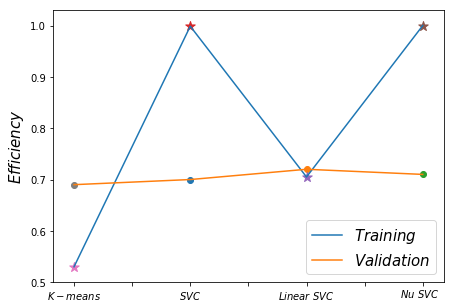

In [182]:
axes = figure(figsize=(7,5)).add_subplot(111)
a=axes.get_xticks().tolist()
a[1]='$K-means$'
a[2] = ''
a[3]='$SVC$'
a[4] = ''
a[5]='$Linear\ SVC$'
#a[7]='Nu SVC'
text(2.8, 0.47, '$Nu\ SVC$')
print(a)
axes.set_xticklabels(a)


scatter(1, perf_SVC)
scatter(2, perf_LinearSVC)
scatter(3, perf_NuSVC)

scatter(1, perf_SVC_tr,  marker='*', s=100)
scatter(2, perf_LinearSVC_tr, marker='*', s=100)
scatter(3, perf_NuSVC_tr, marker='*', s=100)


scatter(0, perf_kmeans_tr, marker='*', s=100)
scatter(0, perf_kmeans_val)

plot(x_axis, training, label='$Training$')
plot(x_axis, validation, label='$Validation$')
ylabel('$Efficiency$', fontsize=15)
legend(fontsize=15)
savefig('All_eff.pdf', bbox_inches='tight')

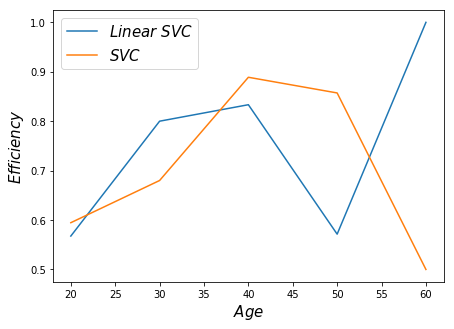

In [45]:
figure(figsize=(7,5))
plot(ages[:-1], [perf_LinearSVC_val_age1, perf_LinearSVC_val_age2, perf_LinearSVC_val_age3, perf_LinearSVC_val_age4, 
           perf_LinearSVC_val_age5], label='$Linear\ SVC$')

plot(ages[:-1], [perf_SVC_val_age1, perf_SVC_val_age2, perf_SVC_val_age3, perf_SVC_val_age4, perf_SVC_val_age5],
    label='$SVC$')

#plot(ages[:-1], [perf_NuSVC_val_age1, perf_NuSVC_val_age2, perf_NuSVC_val_age3, perf_NuSVC_val_age4, 
#           perf_NuSVC_val_age5])
legend(fontsize=15)
ylabel('$Efficiency$', fontsize=15)
xlabel('$Age$', fontsize=15)
savefig('SVC_age.pdf', bbox_inches='tight')

## genre

In [37]:
predictions_SVC_val_gen1 = core_method_SVC(X_tr_genre1, Y_tr_genre1, X_val_genre1)
predictions_LinearSVC_val_gen1 = core_method_LinearSVC(X_tr_genre1, Y_tr_genre1, X_val_genre1)
predictions_NuSVC_val_gen1 = core_method_NuSVC(X_tr_genre1, Y_tr_genre1, X_val_genre1)

perf_SVC_val_gen1 = performance(predictions_SVC_val_gen1, Y_val_genre1)
perf_LinearSVC_val_gen1 = performance(predictions_LinearSVC_val_gen1, Y_val_genre1)
perf_NuSVC_val_gen1 = performance(predictions_NuSVC_val_gen1, Y_val_genre1)


predictions_SVC_val_gen2 = core_method_SVC(X_tr_genre2, Y_tr_genre2, X_val_genre2)
predictions_LinearSVC_val_gen2 = core_method_LinearSVC(X_tr_genre2, Y_tr_genre2, X_val_genre2)
predictions_NuSVC_val_gen2 = core_method_NuSVC(X_tr_genre2, Y_tr_genre2, X_val_genre2)

perf_SVC_val_gen2 = performance(predictions_SVC_val_gen2, Y_val_genre2)
perf_LinearSVC_val_gen2 = performance(predictions_LinearSVC_val_gen2, Y_val_genre2)
perf_NuSVC_val_gen2 = performance(predictions_NuSVC_val_gen2, Y_val_genre2)

predictions_SVC_val_gen3 = core_method_SVC(X_tr_genre3, Y_tr_genre3, X_val_genre3)
predictions_LinearSVC_val_gen3 = core_method_LinearSVC(X_tr_genre3, Y_tr_genre3, X_val_genre3)
predictions_NuSVC_val_gen3 = core_method_NuSVC(X_tr_genre3, Y_tr_genre3, X_val_genre3)

perf_SVC_val_gen3 = performance(predictions_SVC_val_gen3, Y_val_genre3)
perf_LinearSVC_val_gen3 = performance(predictions_LinearSVC_val_gen3, Y_val_genre3)
perf_NuSVC_val_gen3 = performance(predictions_NuSVC_val_gen3, Y_val_genre3)

predictions_SVC_val_gen4 = core_method_SVC(X_tr_genre4, Y_tr_genre4, X_val_genre4)
predictions_LinearSVC_val_gen4 = core_method_LinearSVC(X_tr_genre4, Y_tr_genre4, X_val_genre4)
predictions_NuSVC_val_gen4 = core_method_NuSVC(X_tr_genre4, Y_tr_genre4, X_val_genre4)

perf_SVC_val_gen4 = performance(predictions_SVC_val_gen4, Y_val_genre4)
perf_LinearSVC_val_gen4 = performance(predictions_LinearSVC_val_gen4, Y_val_genre4)
perf_NuSVC_val_gen4 = performance(predictions_NuSVC_val_gen4, Y_val_genre4)

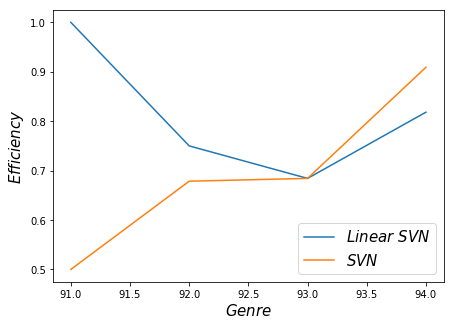

In [44]:
figure(figsize=(7,5))


plot([91, 92, 93, 94], [perf_LinearSVC_val_gen1, perf_LinearSVC_val_gen2, perf_LinearSVC_val_gen3, 
                        perf_LinearSVC_val_gen4], label='$Linear\ SVN$')


plot([91, 92, 93, 94], [perf_SVC_val_gen1, perf_SVC_val_gen2, perf_SVC_val_gen3, 
                        perf_SVC_val_gen4], label='$SVN$')

legend(fontsize=15)
ylabel('$Efficiency$', fontsize=15)
xlabel('$Genre$', fontsize=15)
savefig('SVC_genre.pdf', bbox_inches='tight')


## 2.

In [39]:
def core_method(X_train, Y_train, data_test, col_del):
    X_del = delete(X_train, col_del, 1)
    X_val_del = delete(data_test, col_del, 1)
    #print(shape(X_del))
    clf = svm.NuSVC()
    clf.fit(X_del, Y_train)
    predictions = clf.predict(X_val_del)
    return predictions

In [47]:
pred_no_age = core_method(X_tr, Y_tr, X_val, 12)
pred_no_genre = core_method(X_tr, Y_tr, X_val, 8)

In [48]:
performance(pred_no_age, Y_val)


0.69999999999999996

In [49]:
performance(pred_no_genre, Y_val)

0.69999999999999996

In [142]:
def core_method2(X_train, data_test, col_del):
    X_copy = copy(X_train)
    Y_train = copy(X_copy[:,col_del])
    X_del = delete(X_copy, col_del, 1)
    X_val_del = delete(data_test, col_del, 1)
    #print(shape(X_del))
    y1 = where(Y_train == 91)[0]
    y2 = where(Y_train == 92)[0]
    y3 = where(Y_train == 92)[0]
    y4 = where(Y_train == 92)[0]

    Y_train[y1] = ones(len(y1))
    Y_train[y2] = zeros(len(y2))
    Y_train[y3] = zeros(len(y3))+2
    Y_train[y4] = zeros(len(y4))+3

    clf = svm.LinearSVC()
    clf.fit(X_del, Y_train)
    predictions = clf.predict(X_val_del)
    return predictions
    

In [139]:
pred_no_age = core_method2(training[:,:-1], X_val, 12)


147


In [138]:
pred_no_age

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [129]:
young_people = np.where(validation[:,12]<=25)

In [133]:
len(young_people[0])

25

In [130]:
validation[young_people,12]

array([[ 25.,  23.,  25.,  24.,  24.,  22.,  22.,  25.,  24.,  25.,  25.,
         24.,  22.,  24.,  20.,  23.,  25.,  23.,  24.,  21.,  24.,  22.,
         25.,  22.,  19.]])

In [135]:
1-25/147.

0.8299319727891157

In [143]:
pred_no_genre = core_method2(training[:,:-1], X_val, 12)


In [144]:
pred_no_genre

array([ 52.,  58.,  65.,  65.,  58.,  36.,  58.,  65.,  65.,  36.,  65.,
        58.,  36.,  65.,  36.,  65.,  52.,  36.,  65.,  65.,  36.,  65.,
        36.,  52.,  65.,  36.,  65.,  58.,  52.,  36.,  65.,  65.,  65.,
        65.,  36.,  65.,  65.,  36.,  36.,  65.,  36.,  52.,  65.,  65.,
        52.,  65.,  36.,  65.,  52.,  58.,  52.,  65.,  36.,  58.,  65.,
        36.,  65.,  65.,  36.,  36.,  65.,  65.,  58.,  65.,  58.,  65.,
        65.,  65.,  65.,  65.,  65.,  58.,  58.,  65.,  36.,  36.,  65.,
        65.,  58.,  65.,  65.,  65.,  52.,  65.,  65.,  65.,  65.,  36.,
        36.,  65.,  36.,  36.,  36.,  65.,  65.,  65.,  65.,  36.,  65.,
        36.])